In [1]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
EXP_TYPE = 'zoom'
EXP_NAME = 'zoom'
LIST_VALS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.9,
             2.0, 2.2, 2.4, 2.5]

subdir_pattern = '*/*/eval.csv'  # This example finds all .txt files in all subdirectories

list_of_root_dirs_by_augment_degree = proc.generate_root_dirs_by_experiment_and_augment_degree_new(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_dict = proc.load_datasets_by_directory(list_of_root_dirs_by_augment_degree, subdir_pattern, show=False)

In [2]:
for root_directory in list_of_root_dirs_by_augment_degree:
    print(root_directory, ' : ' ,len(datasets_dict[root_directory]))
    

/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.4  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.5  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.7  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup/drqv2_aug_pixels-True-zoom-0.8  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_s

In [3]:
column_name = 'episode_reward'
result_stats = proc.generate_stats_for_directories(list_of_root_dirs_by_augment_degree, datasets_dict, column_name)
summary_statistics = proc.compute_summary_stats(result_stats)

# for key, stats in summary_statistics.items():
#     print(f"Directory: {key}")
#     print("Sum Statistics:", stats['Sum Statistics'])
#     print("Max Statistics:", stats['Max Statistics'])


print("\n...printing Mean over Sums")
mean_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=True)

print("\n...printing Max over Sums")
max_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=True)



print("\n...printing Max over Maxes")
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')
sorted_items = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=True)

print("\n...printing Mean over Maxes")
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
sorted_items = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=True)



...printing Mean over Sums
1.0: 58722.1
0.95: 41065.9
1.05: 16077.6
1.2: 8569.2
1.1: 4780.500000000001
0.9: 4234.5
1.3: 3485.5999999999995
1.9: 2535.2000000000003
2.5: 1857.3000000000002
2.0: 1602.0000000000002
1.6: 1360.1999999999998
1.5: 1265.3
0.4: 1016.3
0.85: 977.6
0.8: 866.1
1.4: 770.3000000000001
0.7: 716.2
0.3: 596.6999999999999
0.2: 518.7
0.1: 434.1
0.6: 426.3
0.5: 377.9
2.4: 330.8999999999999
2.2: 260.8

...printing Max over Sums
1.0: 58722.1
0.95: 41065.9
1.05: 16077.6
1.2: 8569.2
1.1: 4780.500000000001
0.9: 4234.5
1.3: 3485.5999999999995
1.9: 2535.2000000000003
2.5: 1857.3000000000002
2.0: 1602.0000000000002
1.6: 1360.1999999999998
1.5: 1265.3
0.4: 1016.3
0.85: 977.6
0.8: 866.1
1.4: 770.3000000000001
0.7: 716.2
0.3: 596.6999999999999
0.2: 518.7
0.1: 434.1
0.6: 426.3
0.5: 377.9
2.4: 330.8999999999999
2.2: 260.8

...printing Max over Maxes
1.0: 883.0
0.95: 784.5
1.05: 762.2
1.2: 639.8
1.3: 299.0
2.5: 298.6
1.1: 274.1
0.9: 246.4
2.0: 207.0
0.85: 202.1
1.5: 200.0
1.6: 200.0
1.

In [4]:
subdir_pattern = '*/*/augment.csv'
EXP_NAME = 'zoom'

list_of_root_dirs_by_augment_stats = proc.generate_root_dirs_by_experiment_and_augment_degree_new_augment_stats(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup_augment_stats',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_augstats_dict = proc.load_datasets_by_directory(
    list_of_root_dirs_by_augment_stats, subdir_pattern, show=False)


for root_directory in list_of_root_dirs_by_augment_stats:
    print(root_directory, ' : ' ,len(datasets_augstats_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.4  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.5  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-zoom-0.7  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-zoom/exp/pendulum_swingup_augment_sta

In [5]:
stats_column_names = [
        "manhattan",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

sorted_mean_vals_over_sums_performance = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_sums_performance = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_mean_vals_over_max_performance = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_max_performance = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=False, print_it=False)


for distance in stats_column_names:
    result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
    mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
    sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

    print("\n", distance)
    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)
    print()



 manhattan
Pearson correlation coefficient (means over sums): 0.7371284486556486
Pearson correlation coefficient (maxes over sums): 0.7371284486556486
Pearson correlation coefficient (means over maxes): 0.9404355192891409
Pearson correlation coefficient (maxes over maxes): 0.9404355192891409


 kl_div
Pearson correlation coefficient (means over sums): 0.7025278160534382
Pearson correlation coefficient (maxes over sums): 0.7025278160534382
Pearson correlation coefficient (means over maxes): 0.9281668099170022
Pearson correlation coefficient (maxes over maxes): 0.9281668099170022


 hamming
Pearson correlation coefficient (means over sums): 0.1713745916572666
Pearson correlation coefficient (maxes over sums): 0.1713745916572666
Pearson correlation coefficient (means over maxes): 0.3296287493978415
Pearson correlation coefficient (maxes over maxes): 0.3296287493978415


 euclidian
Pearson correlation coefficient (means over sums): 0.7642049718810626
Pearson correlation coefficient (maxes

Pearson correlation coefficient (means over sums): 0.7642049718810626
Pearson correlation coefficient (maxes over sums): 0.7642049718810626
Pearson correlation coefficient (means over maxes): 0.9513766474084864
Pearson correlation coefficient (maxes over maxes): 0.9513766474084864


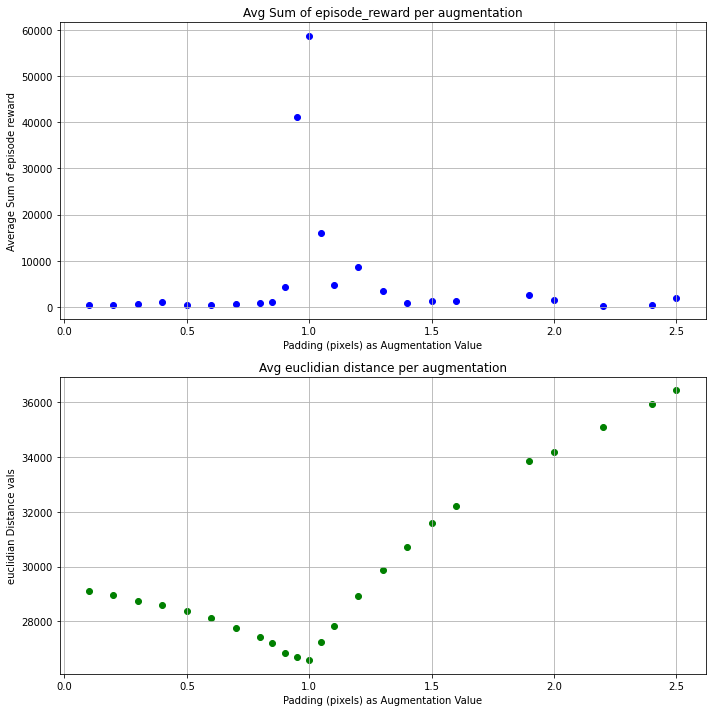

In [6]:
stats_distance_name = 'euclidian'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)



correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)


proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.4804772019687533
Pearson correlation coefficient (maxes over sums): 0.4804772019687533
Pearson correlation coefficient (means over maxes): 0.6925758015327663
Pearson correlation coefficient (maxes over maxes): 0.6925758015327663


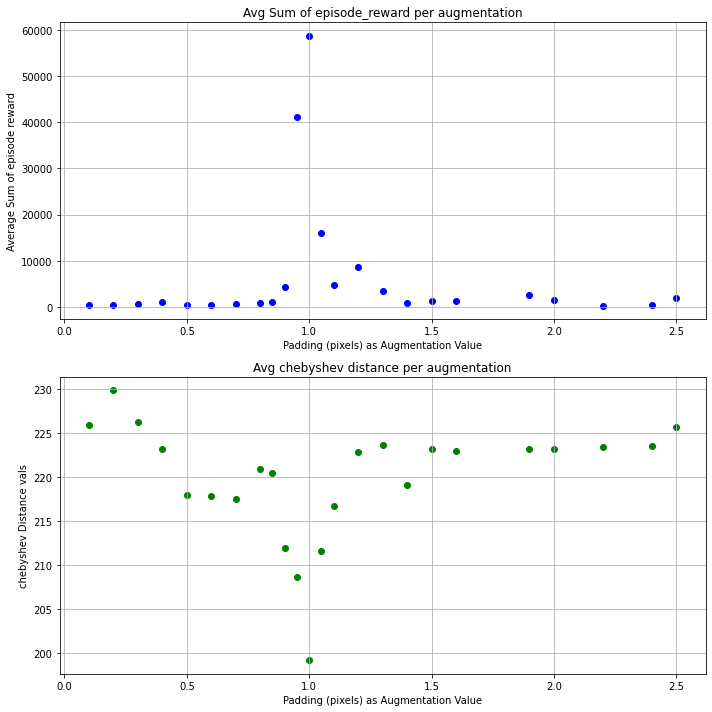

In [7]:
stats_distance_name = 'chebyshev'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)


correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.7340421901762586
Pearson correlation coefficient (maxes over sums): 0.7340421901762586
Pearson correlation coefficient (means over maxes): 0.9309765809059503
Pearson correlation coefficient (maxes over maxes): 0.9309765809059503


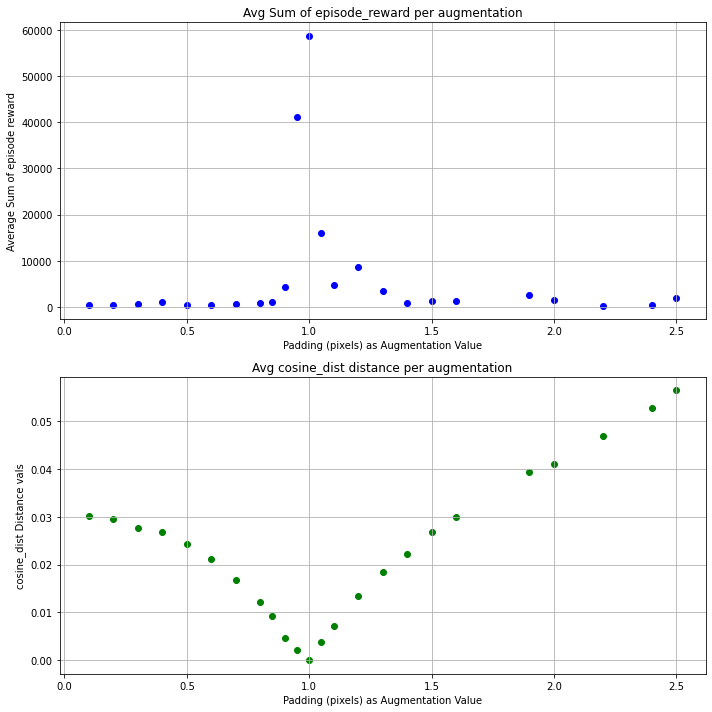

In [8]:
stats_distance_name = 'cosine_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.6773415828975966
Pearson correlation coefficient (maxes over sums): 0.6773415828975966
Pearson correlation coefficient (means over maxes): 0.9132405800045515
Pearson correlation coefficient (maxes over maxes): 0.9132405800045515


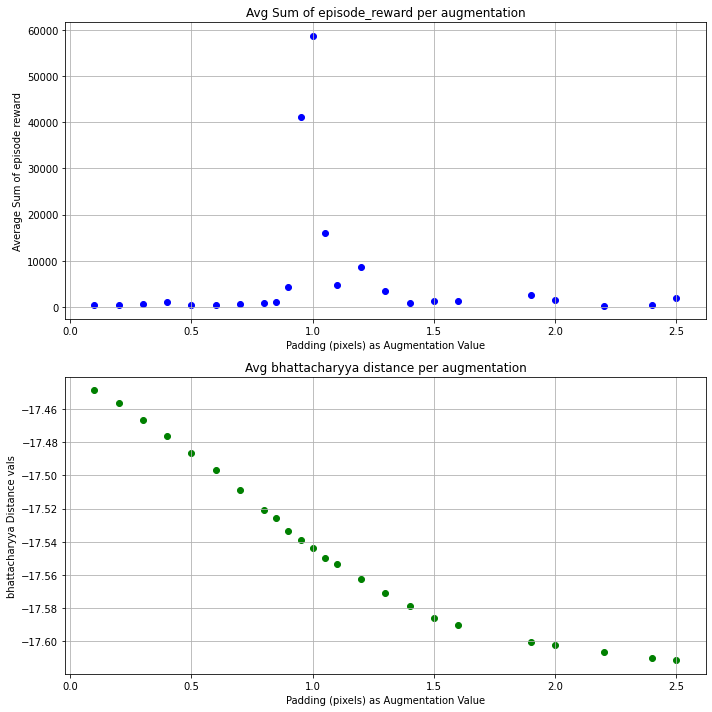

In [9]:
stats_distance_name = 'bhattacharyya'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.1713745916572666
Pearson correlation coefficient (maxes over sums): 0.1713745916572666
Pearson correlation coefficient (means over maxes): 0.3296287493978415
Pearson correlation coefficient (maxes over maxes): 0.3296287493978415


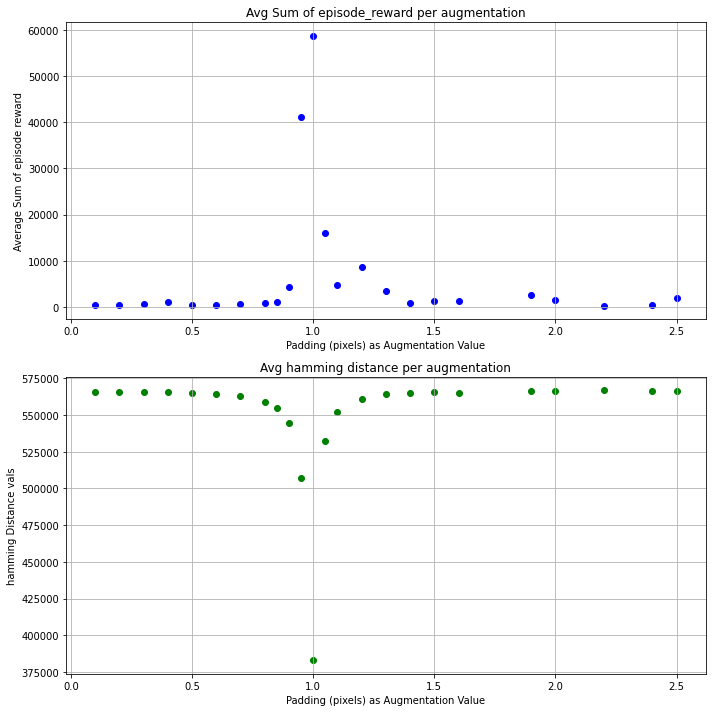

In [10]:
stats_distance_name = 'hamming'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.7025278160534382
Pearson correlation coefficient (maxes over sums): 0.7025278160534382
Pearson correlation coefficient (means over maxes): 0.9281668099170022
Pearson correlation coefficient (maxes over maxes): 0.9281668099170022


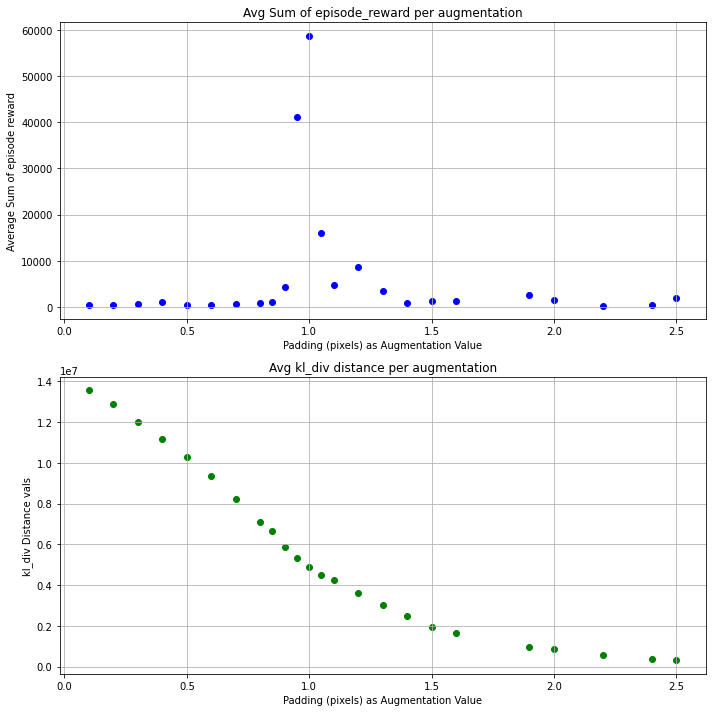

In [11]:
stats_distance_name = 'kl_div'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.7371284486556486
Pearson correlation coefficient (maxes over sums): 0.7371284486556486
Pearson correlation coefficient (means over maxes): 0.9404355192891409
Pearson correlation coefficient (maxes over maxes): 0.9404355192891409


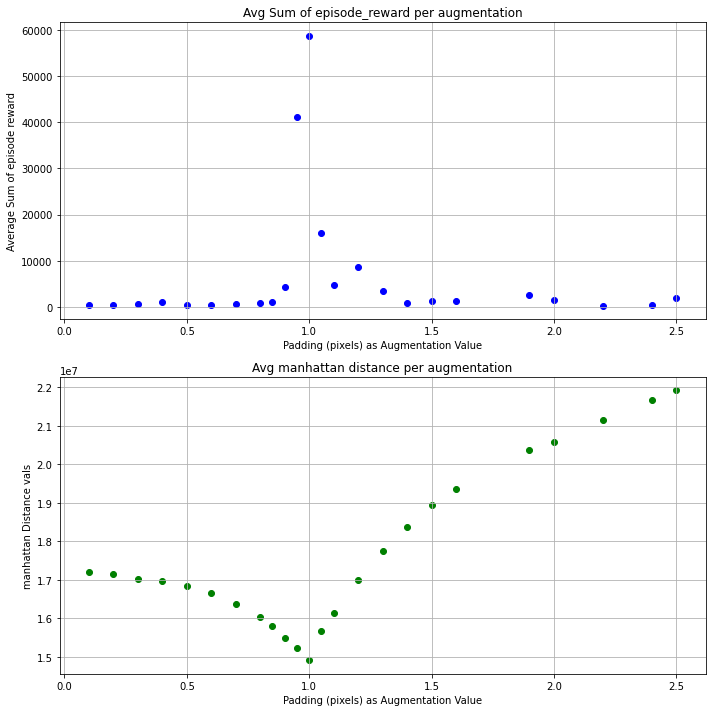

In [12]:
stats_distance_name = 'manhattan'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')